In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import numpy as np
from numpy import pi

In [2]:
from qutip import *
from qutip.control import *
from qiskit import *

In [3]:
T = 2.5
times = np.linspace(0, T, 300)

In [4]:
U = hadamard_transform(); U

<ipython-input-4-58ced36399d5>:1: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  U = hadamard_transform(); U


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

In [5]:
##         ***********Process Tomography***********

In [6]:
R = 150
H0=sigmaz()
H_ops = [sigmax(), sigmay(), sigmaz()]

H_labels = [r'$u_{x}$',
            r'$u_{y}$',
            r'$u_{z}$',
        ]

In [7]:
from qutip.control.grape import plot_grape_control_fields, _overlap
from qutip.control.cy_grape import cy_overlap
from qutip.control.grape import cy_grape_unitary, grape_unitary_adaptive

In [8]:


from scipy.interpolate import interp1d
from qutip.ui.progressbar import TextProgressBar



In [ ]:
u0 = np.array([np.random.rand(len(times)) * 2 * pi * 0.005 for _ in range(len(H_ops))])

u0 = [np.convolve(np.ones(10)/10, u0[idx,:], mode='same') for idx in range(len(H_ops))]


In [10]:
result = cy_grape_unitary(U, H0, H_ops, R, times, u_start=u0, eps=2*pi/T, phase_sensitive=False,
                          progress_bar=TextProgressBar())


10.0%. Run time:  15.91s. Est. time left: 00:00:02:23
20.0%. Run time:  32.73s. Est. time left: 00:00:02:10
30.0%. Run time:  48.35s. Est. time left: 00:00:01:52
40.0%. Run time:  63.35s. Est. time left: 00:00:01:35
50.0%. Run time:  78.53s. Est. time left: 00:00:01:18
60.0%. Run time:  94.05s. Est. time left: 00:00:01:02
70.0%. Run time: 109.40s. Est. time left: 00:00:00:46
80.0%. Run time: 124.43s. Est. time left: 00:00:00:31
90.0%. Run time: 139.76s. Est. time left: 00:00:00:15
Total run time: 153.96s


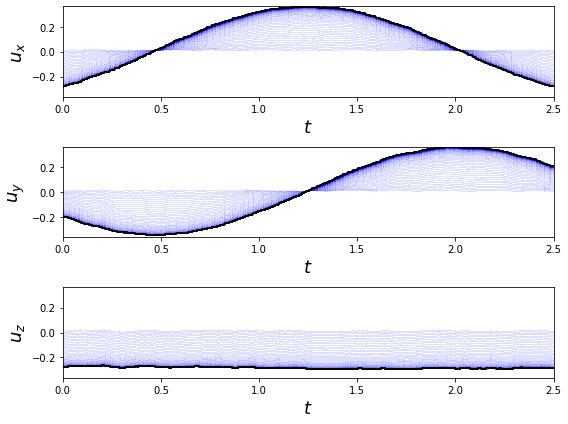

In [11]:
plot_grape_control_fields(times, result.u[:,:,:] , H_labels, uniform_axes=True); 

In [12]:
# target unitary
U

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

In [13]:
# unitary from grape pulse
result.U_f

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[-1.64691806e-07-0.70710684j -1.79818335e-08-0.70710673j]
 [ 1.79818331e-08-0.70710673j -1.64691805e-07+0.70710684j]]

In [14]:


# target / result overlap
_overlap(U, result.U_f).real, abs(_overlap(U, result.U_f))**2



(-3.154751183340388e-16, 0.9999999999999605)

In [15]:
c_ops = []
U_f_numerical = propagator(result.H_t, times, c_ops, args={})

U_f_numerical[-1]



Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[-2.03754536e-06-0.70706087j -5.90194476e-03-0.70712806j]
 [ 5.90194476e-03-0.70712806j -2.03754536e-06+0.70706087j]]

In [16]:
U_f_numerical[-1]/U_f_numerical[-1][0,0]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 1.        +0.00000000e+00j  1.00009506-8.34427033e-03j]
 [ 1.00009501+8.35003430e-03j -1.        -5.76342280e-06j]]

In [17]:
abs(_overlap(U, U_f_numerical[-1]))

0.9999825822415127

In [ ]:
op_basis = [[qeye(2), sigmax(), sigmay(), sigmaz()]]
op_label = [["i", "x", "y", "z"]]

In [ ]:
fig = plt.figure(figsize=(8,6))

U_ideal = spre(U) * spost(U.dag())

chi = qpt(U_ideal, op_basis)

fig = qpt_plot_combined(chi, op_label, fig=fig, threshold=0.001)

In [ ]:
fig = plt.figure(figsize=(8,6))

U_ideal = spre(result.U_f) * spost(result.U_f.dag())

chi = qpt(U_ideal, op_basis)

fig = qpt_plot_combined(chi, op_label, fig=fig, threshold=0.001)